In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1640


<Axes: xlabel='Time'>

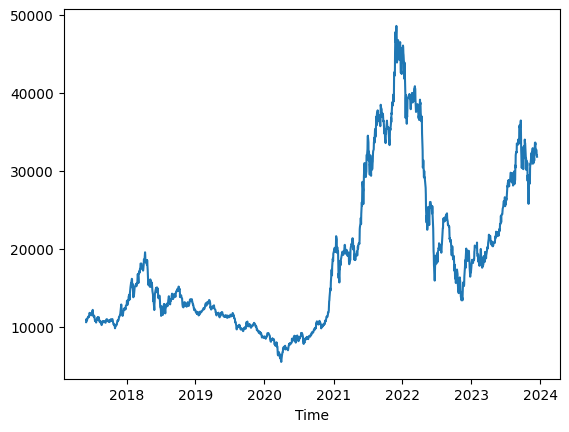

In [2]:
#2. Fetch data and visualize
SSI = stock_historical_data(symbol = "SSI", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(SSI['Close']))
SSI
SSI["Close"].plot()

In [3]:
# Preprocessing
df = SSI['Close']
df=df.reset_index()
df['Lag1'] = range(0, 1640)
df['Lag2'] = df['Lag1'].shift(1)
df['Lag3'] = df['Lag2'].shift(1)
df = df.dropna()
df

,Time,Close,Lag1,Lag2,Lag3
2,2017-06-05,10740,2,1.0,0.0
3,2017-06-06,10870,3,2.0,1.0
4,2017-06-07,10980,4,3.0,2.0
5,2017-06-08,11060,5,4.0,3.0
6,2017-06-09,11140,6,5.0,4.0
...,...,...,...,...,...
1635,2023-12-11,32700,1635,1634.0,1633.0
1636,2023-12-12,32600,1636,1635.0,1634.0
1637,2023-12-13,32000,1637,1636.0,1635.0
1638,2023-12-14,32000,1638,1637.0,1636.0


In [4]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [5]:
#4. Training process
x_train = np.array([train_data['Lag1'],train_data['Lag2'], train_data['Lag3']]).reshape(-1, 3)
y_train = np.array(train_data['Close'])

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing process
x_test = np.array([test_data['Lag1'],test_data['Lag2'], test_data['Lag3']]).reshape(-1, 3)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)
y_pred

array([21584.2477791 , 21616.74374644, 21649.23971377, 21681.73568111,
       21714.23164844, 21746.72761578, 21779.22358311, 21811.71955045,
       21844.21551778, 21876.71148512, 21909.20745245, 21941.70341979,
       21974.19938712, 22006.69535446, 22039.19132179, 22071.68728912,
       22104.18325646, 22136.67922379, 22169.17519113, 22201.67115846,
       22234.1671258 , 22266.66309313, 22299.15906047, 22331.6550278 ,
       22364.15099514, 22396.64696247, 22429.14292981, 22461.63889714,
       22494.13486448, 22526.63083181, 22559.12679915, 22591.62276648,
       22624.11873382, 22656.61470115, 22689.11066849, 22721.60663582,
       22754.10260316, 22786.59857049, 22819.09453783, 22851.59050516,
       22884.0864725 , 22916.58243983, 22949.07840716, 22981.5743745 ,
       23014.07034183, 23046.56630917, 23079.0622765 , 23111.55824384,
       23144.05421117, 23176.55017851, 23209.04614584, 23241.54211318,
       23274.03808051, 23306.53404785, 23339.03001518, 23371.52598252,
      

In [7]:
# 6. 60 days prediction
last_index =  len(df)
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
range_arr_1 = np.array(range(last_index+1, last_index+61))
range_arr_2 = np.array(range(last_index, last_index+60))
range_arr_3 = np.array(range(last_index-1, last_index+59))

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array([range_arr_1,
                          range_arr_2,
                          range_arr_3]).reshape(-1, 3)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[26902.7544329  26935.25040023 26967.74636757 27000.2423349
 27032.73830224 27065.23426957 27097.73023691 27130.22620424
 27162.72217158 27195.21813891 27227.71410625 27260.21007358
 27292.70604092 27325.20200825 27357.69797559 27390.19394292
 27422.68991026 27455.18587759 27487.68184493 27520.17781226
 26891.92244379 26924.41841112 26956.91437846 26989.41034579
 27021.90631313 27054.40228046 27086.8982478  27119.39421513
 27151.89018247 27184.3861498  27216.88211714 27249.37808447
 27281.87405181 27314.37001914 27346.86598648 27379.36195381
 27411.85792115 27444.35388848 27476.84985581 27509.34582315
 26881.09045468 26913.58642201 26946.08238935 26978.57835668
 27011.07432402 27043.57029135 27076.06625869 27108.56222602
 27141.05819335 27173.55416069 27206.05012802 27238.54609536
 27271.04206269 27303.53803003 27336.03399736 27368.5299647
 27401.02593203 27433.52189937 27466.0178667  27498.51383404]


In [10]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))

Testing RMSE: 8272.427248448203
Testing MAPE: 25.52591217909815
Testing MAE: 6644.4464987963875
MSLR:  0.09477768348387768


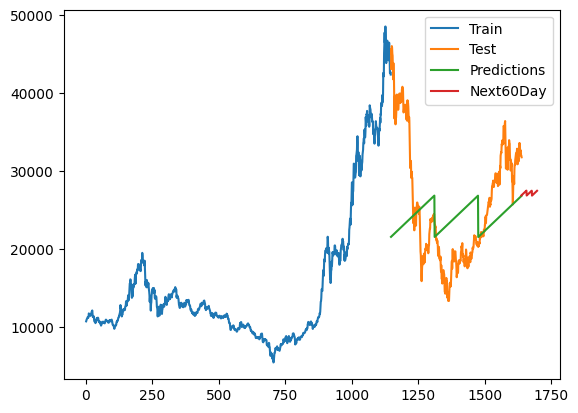

In [9]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()